In [8]:
# ============================================
# MACHINE LEARNING TUTORIAL
# Supervised and Unsupervised Learning
# Student: KEERTHANA KOLUGURI
# ============================================

# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.datasets import load_iris, fetch_california_housing, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Supervised Learning - Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Supervised Learning - Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Unsupervised Learning - Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Unsupervised Learning - Dimensionality Reduction
from sklearn.decomposition import PCA

print("All libraries imported successfully!")
print("="*50)

All libraries imported successfully!


SUPERVISED LEARNING - CLASSIFICATION
Dataset Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<Figure size 1200x800 with 0 Axes>

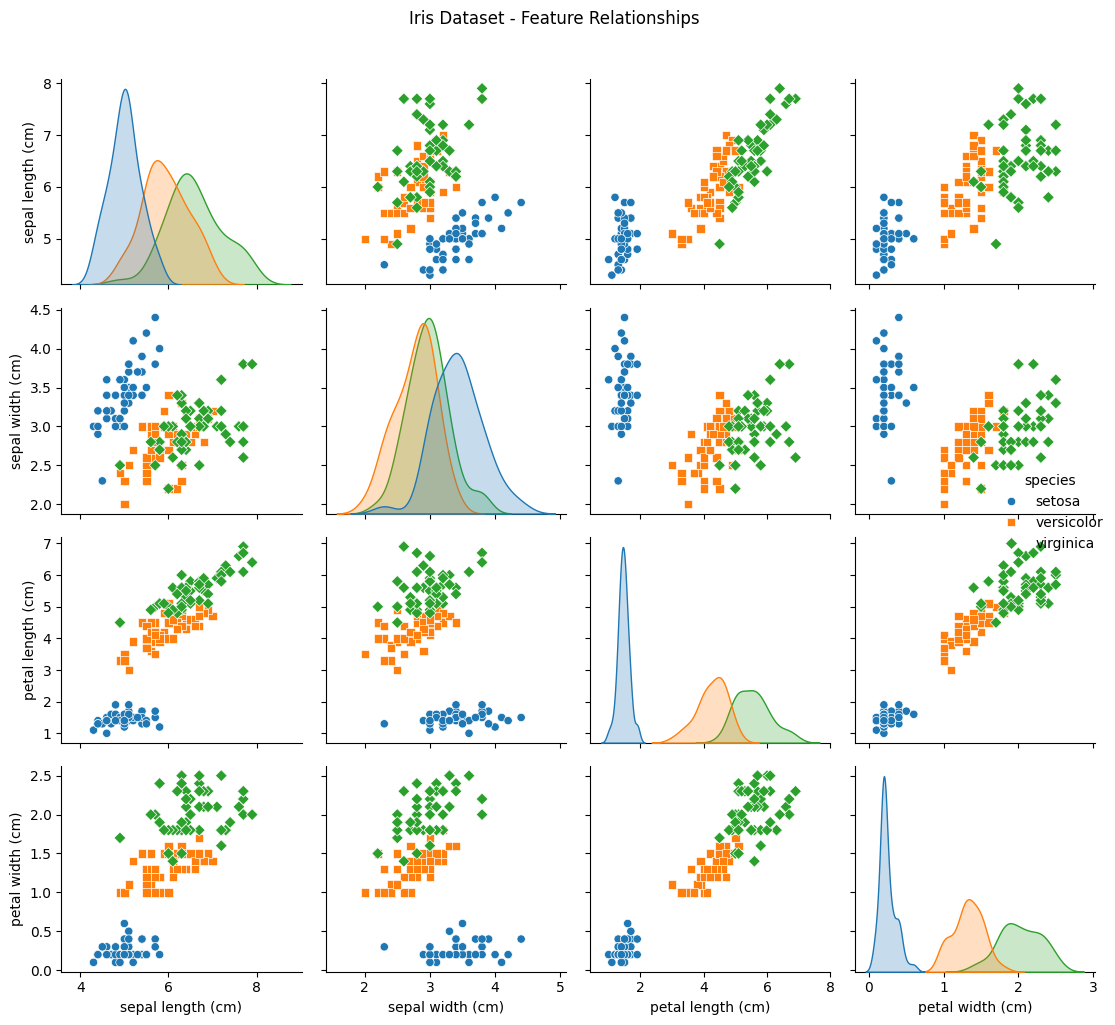

In [2]:
# ============================================
# PART 1: SUPERVISED LEARNING - CLASSIFICATION
# ============================================

# Load the Iris Dataset
print("SUPERVISED LEARNING - CLASSIFICATION")
print("="*50)

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Data Visualization - Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset - Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()


TRAINING CLASSIFICATION MODELS
Training set size: 105
Test set size: 45

K-Nearest Neighbors:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest:
Accuracy: 1.0000
Classification

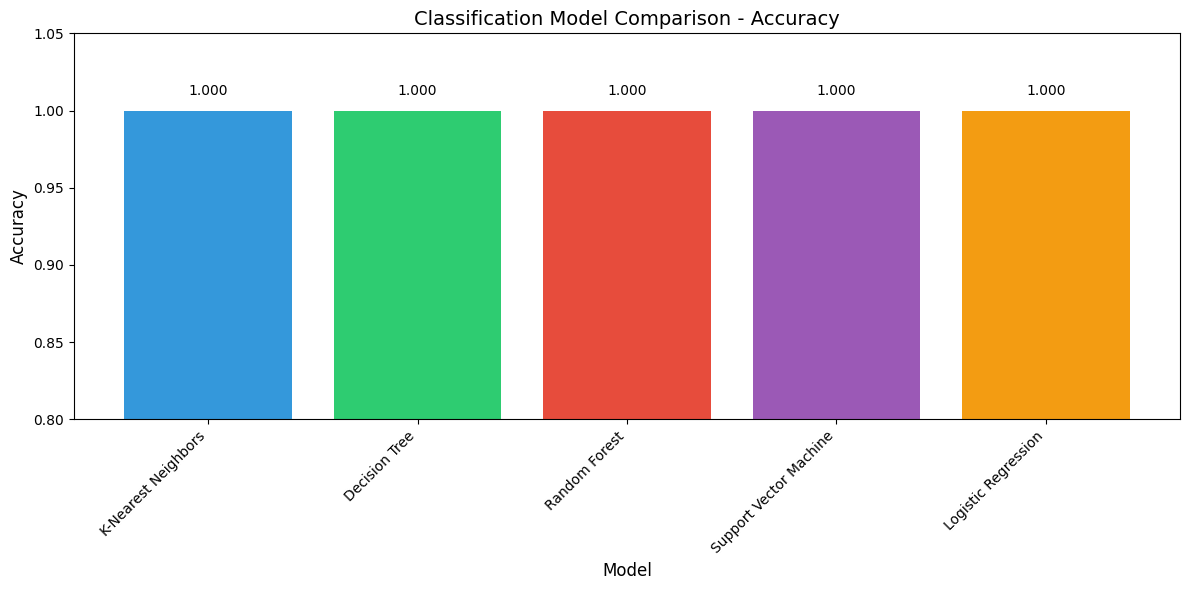


Best Classification Model: K-Nearest Neighbors with 1.0000 accuracy


In [3]:
# Classification Model Training and Comparison
print("\nTRAINING CLASSIFICATION MODELS")
print("="*50)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Classification Models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200)
}

# Train and Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

# Model Comparison Visualization
plt.figure(figsize=(12, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']
plt.bar(results.keys(), results.values(), color=colors)
plt.title('Classification Model Comparison - Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45, ha='right')
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

print(f"\nBest Classification Model: {max(results, key=results.get)} with {max(results.values()):.4f} accuracy")


SUPERVISED LEARNING - REGRESSION
Dataset Shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000 

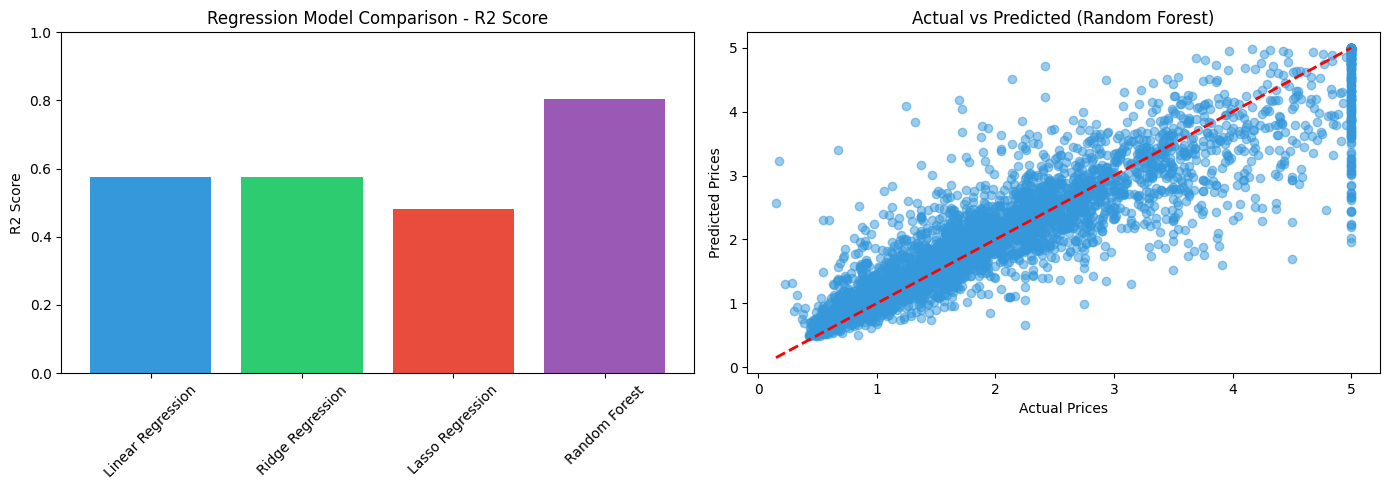

In [4]:
# ============================================
# PART 1: SUPERVISED LEARNING - REGRESSION
# ============================================

print("\nSUPERVISED LEARNING - REGRESSION")
print("="*50)

# Load California Housing Dataset
housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target
feature_names_reg = housing.feature_names

print(f"Dataset Shape: {X_reg.shape}")
print(f"Features: {feature_names_reg}")

# Create DataFrame
df_housing = pd.DataFrame(X_reg, columns=feature_names_reg)
df_housing['Price'] = y_reg
print("\nDataset Statistics:")
print(df_housing.describe())

# Split Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale Features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Define Regression Models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and Evaluate Regression Models
reg_results = {}

for name, model in reg_models.items():
    model.fit(X_train_reg_scaled, y_train_reg)
    y_pred_reg = model.predict(X_test_reg_scaled)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)

    reg_results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2 Score: {r2:.4f}")

# Visualize Regression Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R2 Score Comparison
r2_scores = [reg_results[m]['R2'] for m in reg_models.keys()]
axes[0].bar(reg_models.keys(), r2_scores, color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])
axes[0].set_title('Regression Model Comparison - R2 Score', fontsize=12)
axes[0].set_ylabel('R2 Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

# Actual vs Predicted (Best Model - Random Forest)
best_reg_model = reg_models['Random Forest']
y_pred_best = best_reg_model.predict(X_test_reg_scaled)
axes[1].scatter(y_test_reg, y_pred_best, alpha=0.5, color='#3498db')
axes[1].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Actual vs Predicted (Random Forest)', fontsize=12)

plt.tight_layout()
plt.show()


UNSUPERVISED LEARNING - CLUSTERING

Finding Optimal K using Elbow Method...


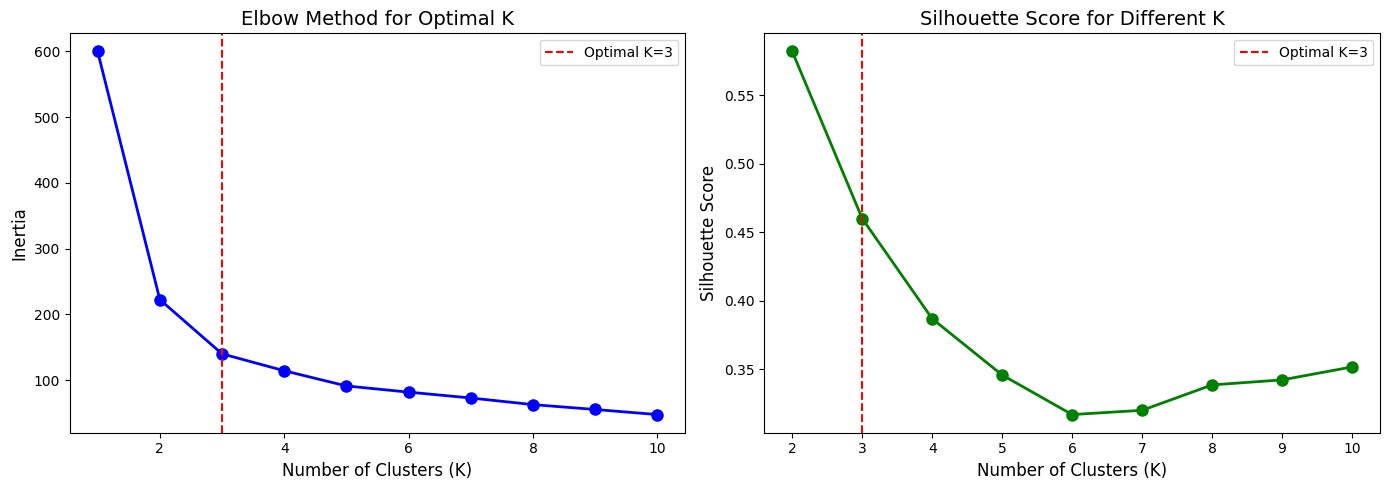

In [5]:
# ============================================
# PART 2: UNSUPERVISED LEARNING - CLUSTERING
# ============================================

print("\nUNSUPERVISED LEARNING - CLUSTERING")
print("="*50)

# Use Iris data without labels (unsupervised)
iris_unsup = load_iris()
X_unsup = iris_unsup.data
y_true_unsup = iris_unsup.target  # Only for evaluation

# Scale Data
scaler_unsup = StandardScaler()
X_unsup_scaled = scaler_unsup.fit_transform(X_unsup)

# Find Optimal K using Elbow Method
print("\nFinding Optimal K using Elbow Method...")
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_unsup_scaled)
    inertias.append(kmeans_temp.inertia_)

# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_unsup_scaled)
    score = silhouette_score(X_unsup_scaled, labels_temp)
    silhouette_scores.append(score)

# Visualize Elbow and Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14)
axes[0].axvline(x=3, color='r', linestyle='--', label='Optimal K=3')
axes[0].legend()

axes[1].plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different K', fontsize=14)
axes[1].axvline(x=3, color='r', linestyle='--', label='Optimal K=3')
axes[1].legend()

plt.tight_layout()
plt.show()


APPLYING CLUSTERING ALGORITHMS

K-Means (K=3):
  Silhouette Score: 0.4599
  Adjusted Rand Index: 0.6201

Hierarchical Clustering:
  Silhouette Score: 0.4467
  Adjusted Rand Index: 0.6153

DBSCAN:
  Number of clusters found: 2
  Number of noise points: 4
  Silhouette Score: 0.5979


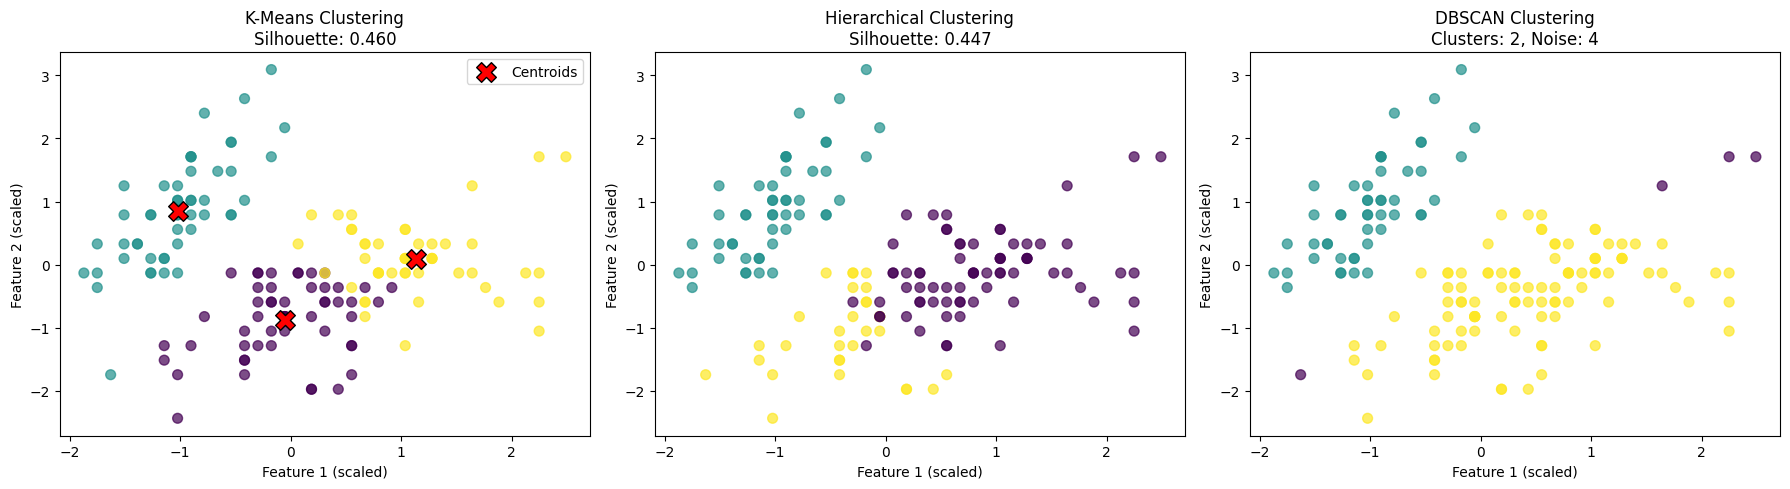

In [6]:
# Apply Different Clustering Algorithms
print("\nAPPLYING CLUSTERING ALGORITHMS")
print("="*50)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_unsup_scaled)
kmeans_silhouette = silhouette_score(X_unsup_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_true_unsup, kmeans_labels)
print(f"\nK-Means (K=3):")
print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
print(f"  Adjusted Rand Index: {kmeans_ari:.4f}")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_unsup_scaled)
hierarchical_silhouette = silhouette_score(X_unsup_scaled, hierarchical_labels)
hierarchical_ari = adjusted_rand_score(y_true_unsup, hierarchical_labels)
print(f"\nHierarchical Clustering:")
print(f"  Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"  Adjusted Rand Index: {hierarchical_ari:.4f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_unsup_scaled)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"\nDBSCAN:")
print(f"  Number of clusters found: {n_clusters_dbscan}")
print(f"  Number of noise points: {n_noise}")
if n_clusters_dbscan > 1:
    mask = dbscan_labels != -1
    if sum(mask) > 0 and len(set(dbscan_labels[mask])) > 1:
        dbscan_silhouette = silhouette_score(X_unsup_scaled[mask], dbscan_labels[mask])
        print(f"  Silhouette Score: {dbscan_silhouette:.4f}")

# Visualize Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
scatter1 = axes[0].scatter(X_unsup_scaled[:, 0], X_unsup_scaled[:, 1],
                           c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroids')
axes[0].set_title(f'K-Means Clustering\nSilhouette: {kmeans_silhouette:.3f}', fontsize=12)
axes[0].set_xlabel('Feature 1 (scaled)')
axes[0].set_ylabel('Feature 2 (scaled)')
axes[0].legend()

# Hierarchical
scatter2 = axes[1].scatter(X_unsup_scaled[:, 0], X_unsup_scaled[:, 1],
                           c=hierarchical_labels, cmap='viridis', s=50, alpha=0.7)
axes[1].set_title(f'Hierarchical Clustering\nSilhouette: {hierarchical_silhouette:.3f}', fontsize=12)
axes[1].set_xlabel('Feature 1 (scaled)')
axes[1].set_ylabel('Feature 2 (scaled)')

# DBSCAN
scatter3 = axes[2].scatter(X_unsup_scaled[:, 0], X_unsup_scaled[:, 1],
                           c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
axes[2].set_title(f'DBSCAN Clustering\nClusters: {n_clusters_dbscan}, Noise: {n_noise}', fontsize=12)
axes[2].set_xlabel('Feature 1 (scaled)')
axes[2].set_ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()


DIMENSIONALITY REDUCTION - PCA

Explained Variance Ratio by Component:
  PC1: 0.7296 (Cumulative: 0.7296)
  PC2: 0.2285 (Cumulative: 0.9581)
  PC3: 0.0367 (Cumulative: 0.9948)
  PC4: 0.0052 (Cumulative: 1.0000)


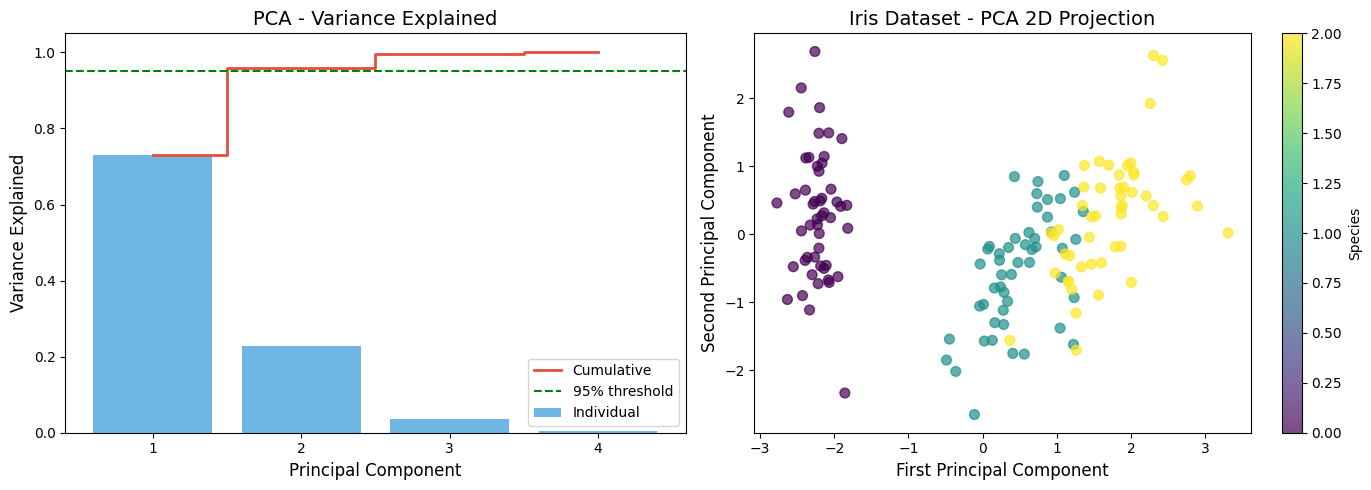


Original shape: (150, 4)
Reduced shape: (150, 2)
Variance retained: 0.9581 (95.8%)

TUTORIAL SUMMARY

SUPERVISED LEARNING:
  - Classification: Predicting categorical labels
  - Regression: Predicting continuous values
  - Requires labeled training data

UNSUPERVISED LEARNING:
  - Clustering: Grouping similar data points
  - Dimensionality Reduction: Reducing feature space
  - No labels required - finds patterns in data

KEY TAKEAWAYS:
  - Choose supervised when you have labeled data
  - Choose unsupervised for pattern discovery
  - Always preprocess and scale your data
  - Evaluate models using appropriate metrics
END OF TUTORIAL


In [7]:
# ============================================
# PART 2: UNSUPERVISED LEARNING - PCA
# ============================================

print("\nDIMENSIONALITY REDUCTION - PCA")
print("="*50)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_unsup_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio by Component:")
for i, var in enumerate(explained_variance):
    print(f"  PC{i+1}: {var:.4f} (Cumulative: {cumulative_variance[i]:.4f})")

# Visualize PCA Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Explained Variance Plot
axes[0].bar(range(1, len(explained_variance)+1), explained_variance,
            alpha=0.7, color='#3498db', label='Individual')
axes[0].step(range(1, len(explained_variance)+1), cumulative_variance,
             where='mid', color='#e74c3c', linewidth=2, label='Cumulative')
axes[0].axhline(y=0.95, color='green', linestyle='--', label='95% threshold')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Variance Explained', fontsize=12)
axes[0].set_title('PCA - Variance Explained', fontsize=14)
axes[0].legend()
axes[0].set_xticks(range(1, len(explained_variance)+1))

# 2D PCA Projection
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true_unsup,
                          cmap='viridis', s=50, alpha=0.7)
axes[1].set_xlabel('First Principal Component', fontsize=12)
axes[1].set_ylabel('Second Principal Component', fontsize=12)
axes[1].set_title('Iris Dataset - PCA 2D Projection', fontsize=14)
plt.colorbar(scatter, ax=axes[1], label='Species')

plt.tight_layout()
plt.show()

# Dimensionality Reduction
pca_2d = PCA(n_components=2)
X_reduced = pca_2d.fit_transform(X_unsup_scaled)
print(f"\nOriginal shape: {X_unsup_scaled.shape}")
print(f"Reduced shape: {X_reduced.shape}")
print(f"Variance retained: {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.1f}%)")

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("TUTORIAL SUMMARY")
print("="*60)
print("\nSUPERVISED LEARNING:")
print("  - Classification: Predicting categorical labels")
print("  - Regression: Predicting continuous values")
print("  - Requires labeled training data")
print("\nUNSUPERVISED LEARNING:")
print("  - Clustering: Grouping similar data points")
print("  - Dimensionality Reduction: Reducing feature space")
print("  - No labels required - finds patterns in data")
print("\nKEY TAKEAWAYS:")
print("  - Choose supervised when you have labeled data")
print("  - Choose unsupervised for pattern discovery")
print("  - Always preprocess and scale your data")
print("  - Evaluate models using appropriate metrics")
print("="*60)
print("END OF TUTORIAL")
print("="*60)